# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import pickle
from statsmodels.tsa.arima_model import ARIMA
import itertools
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [37]:
item = 'SUGAR'
city = 'ISLAMABAD'
file = "Data/" + item + '_' + city + "_data" +'.pickle'

with open(file, 'rb') as handle:
    prices = pickle.load(handle)

prices.Month = pd.to_datetime(prices.Month)
prices = prices.set_index('Month')    

# Data Head

In [38]:
prices.head()

,Price
Month,
2012-01-01,55.75
2012-02-01,58.25
2012-03-01,59.50
2012-04-01,59.31
2012-05-01,54.29


# Data Tail

In [39]:
prices.tail()

,Price
Month,
2019-11-01,79.73
2019-12-01,80.13
2020-01-01,80.73
2020-02-01,84.86
2020-03-01,86.14


# Plotting Data

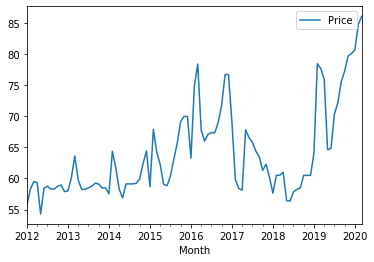

In [40]:
prices.plot()

# Splitting Data

In [33]:
X = prices.values
train = X
predictions = []

In [34]:
months = ["2018-09-01","2018-10-01","2018-11-01","2018-12-01","2019-01-01","2019-02-01","2019-03-01","2019-04-01","2019-05-01","2019-06-01","2019-07-01","2019-08-01","2019-09-01","2019-10-01","2019-11-01","2019-12-01","2020-01-01","2020-01-02","2020-01-03"]

# ARIMA Model Training

In [35]:
model_arima = ARIMA(train,order=(2, 1, 2))
model_arima_fit = model_arima.fit()
predictions = model_arima_fit.forecast(steps=12)[0]
model_arima_fit.aic

537.007377100877

# Plotting Model Curve

Text(0, 0.5, 'Price')

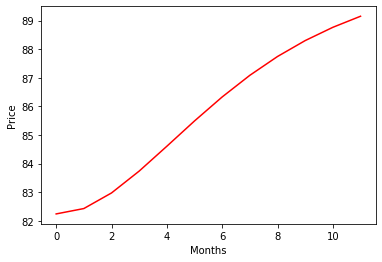

In [36]:
plt.plot(predictions,color='red',label='Forecast')
plt.xlabel("Months")
plt.ylabel("Price")

# Prediction Table

In [27]:
predictions

array([110.75995221, 111.43902978, 112.10148953, 112.21818441,
       112.53946312, 112.62371609, 112.85834101, 112.96641987,
       113.16673269, 113.29489778, 113.47753697, 113.61831783])

# Exporting Model

In [28]:
item = item.replace(" ", "-")
filename = "C:/Users/Umair Afzal/eclipse-workspace/FYP/src/application/Models/" + item + '_' + city + "_model" +'.pickle'
pickle.dump(model_arima_fit, open(filename, 'wb'))